In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D
# import time
import pickle
import random
import time

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive


from rebergrammar_generator import *
from experimentor import Experimentor

import os
os.getcwd()

# np.set_printoptions(threshold=sys.maxsize)

'/home/thabib/Documents/Personal/Master_Thesis/1_HTMImplementation'

### Param Settings

In [2]:
# Network params
M = 8
N = 175
k = 25

perm_decrement = 0.05 # p-
perm_increment = 2*perm_decrement # p+
perm_decay = 0.2*perm_decrement # p--
perm_boost = 0.1*perm_decrement # p++

# Cell params
dendrites_percell = 32
connSynapses_perdend = 32 # not functional, at the moment
nmda_threshold = 20
permanence_threshold = 0.40
init_permanence = 0.25
activity_horizon = None
activity_threshold = None

# Task params
do_ERG = False
nof_strings = 5000

### Experiment Initializer and Launcher

In [3]:
start = time.time()

exp = Experimentor(M=M, N=N, k=k, n_dendrites=dendrites_percell, n_synapses=connSynapses_perdend, 
                   nmda_th=nmda_threshold, perm_th=permanence_threshold, perm_init=init_permanence, 
                   perm_decrement=perm_decrement, perm_increment=perm_increment, 
                   perm_decay=perm_decay, perm_boost=perm_boost,
                   activity_horizon=activity_horizon, activity_th=activity_threshold,
                   do_ERG=do_ERG, nof_strings=nof_strings)

In [4]:
dict_results = exp.run_experiment()

print(time.time()-start)

# 3606 secs for 1000 strings
# 19374 secs for 5000 strings

19374.014357805252


#### Writing Files

In [5]:
if do_ERG:
    result_file = 'Res_ERG_'+str(nof_strings)
    charsMC_file = 'CharsToMC_ERG_'+str(nof_strings)
else:
    result_file = 'Res_SRG_'+str(nof_strings)
    charsMC_file = 'CharsToMC_SRG_'+str(nof_strings)
    
with open(result_file+'.pickle', 'wb') as f:
    pickle.dump(dict_results['results'], f)


with open(charsMC_file+'.pickle', 'wb') as f:
    pickle.dump(dict_results['chars_to_minicols'], f)

# Analysis of Results

#### Loading Files

In [6]:
if do_ERG:
    result_file = 'Res_ERG_'+str(nof_strings)
    charsMC_file = 'CharsToMC_ERG_'+str(nof_strings)
else:
    result_file = 'Res_SRG_'+str(nof_strings)
    charsMC_file = 'CharsToMC_SRG_'+str(nof_strings)

    
with open(result_file+'.pickle', 'rb') as f:
    results = pickle.load(f)

with open(charsMC_file+'.pickle', 'rb') as f:
    charsMC = pickle.load(f)

In [7]:
results

,htm_states,htm_preds,htm_preds_dend,htm_networks
reber_string,,,,
APVTSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
APVTPXVSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
ATXXVSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, [25], na...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
APVTPXVTTSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, [25], na...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
ATXXVSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, [25], na...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
...,...,...,...,...
APVTTPXVSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, [25], na...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
ATXXVPXVTTSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, [25], na...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
APVTSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, [25], na...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...


In [195]:
charsMC

,A,T,S,X,P,V,Z
0,3,6,16,0,7,2,11
1,4,8,22,1,10,15,12
2,5,17,23,27,13,18,19
3,9,50,31,30,14,29,21
4,25,55,33,37,20,34,24
5,26,63,46,40,28,35,36
6,43,64,60,47,32,38,39
7,44,70,61,59,48,41,42
8,45,71,62,78,66,51,49
9,58,74,65,82,69,52,53


In [8]:
in_strings_onehot = dict_results['in_strings_onehot']
out_strings_onehot = dict_results['out_strings_onehot']

In [196]:
# Generating xticks for plots based on characters-minicols

xticks_plot = np.empty(N, dtype=object)
for ch in chars:
    xticks_plot[charsMC[ch]] = ch
    
xticks_plot

array(['X', 'X', 'V', 'A', 'A', 'A', 'T', 'P', 'T', 'A', 'P', 'Z', 'Z',
       'P', 'P', 'V', 'S', 'T', 'V', 'Z', 'P', 'Z', 'S', 'S', 'Z', 'A',
       'A', 'X', 'P', 'V', 'X', 'S', 'P', 'S', 'V', 'V', 'Z', 'X', 'V',
       'Z', 'X', 'V', 'Z', 'A', 'A', 'A', 'S', 'X', 'P', 'Z', 'T', 'V',
       'V', 'Z', 'V', 'T', 'V', 'Z', 'A', 'X', 'S', 'S', 'S', 'T', 'T',
       'S', 'P', 'V', 'V', 'P', 'T', 'T', 'S', 'A', 'T', 'P', 'A', 'T',
       'X', 'P', 'A', 'Z', 'X', 'X', 'V', 'V', 'X', 'V', 'S', 'A', 'X',
       'V', 'S', 'T', 'A', 'X', 'T', 'Z', 'S', 'S', 'V', 'T', 'X', 'S',
       'X', 'P', 'X', 'T', 'S', 'Z', 'X', 'P', 'A', 'Z', 'Z', 'Z', 'T',
       'V', 'X', 'Z', 'A', 'X', 'Z', 'A', 'A', 'A', 'V', 'P', 'S', 'S',
       'Z', 'P', 'P', 'T', 'S', 'S', 'Z', 'T', 'V', 'P', 'X', 'Z', 'V',
       'A', 'P', 'A', 'T', 'T', 'T', 'Z', 'A', 'P', 'T', 'A', 'T', 'P',
       'V', 'S', 'A', 'T', 'P', 'V', 'X', 'Z', 'X', 'S', 'T', 'P', 'X',
       'P', 'S', 'Z', 'X', 'P', 'S'], dtype=object)

## 1. Input String Statistics

In [40]:
in_strings_alpha = [s for s in list(results.index)]
#len(in_strings_alpha)

In [210]:
# NOF UNIQUE Reber strings
len(np.unique(in_strings_alpha))

361

In [259]:
# TOTAL NOF CHARACTERS in the entire inputstream

tot_len_in = 0
for string in in_strings_alpha:
    tot_len_in += len(string)
    
tot_len_in

42518

In [211]:
# NOF STRINGS with a given context

context = 'AT'
sum([i.startswith(context) for i in in_strings_alpha])

2653

### Sample String Length's Histogram

In [173]:
%matplotlib inline

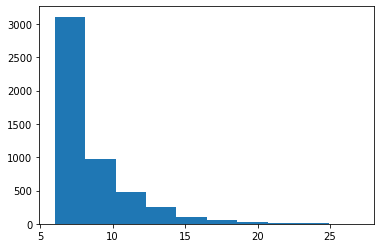

Mean Length of the string:  8.5036
Median Length of the string:  8.0


In [189]:
len_rg_exs = []

for ex in in_strings_alpha:
    len_rg_exs.append(len(ex))

plt.figure()
plt.hist(len_rg_exs)
plt.show()

print('Mean Length of the string: ', np.mean(len_rg_exs))
print('Median Length of the string: ', np.median(len_rg_exs))

## 2. Net Cell Activity & Predictivity

### Computing Network's Total Cell Activity

In [190]:
%matplotlib notebook

<IPython.core.display.Javascript object>


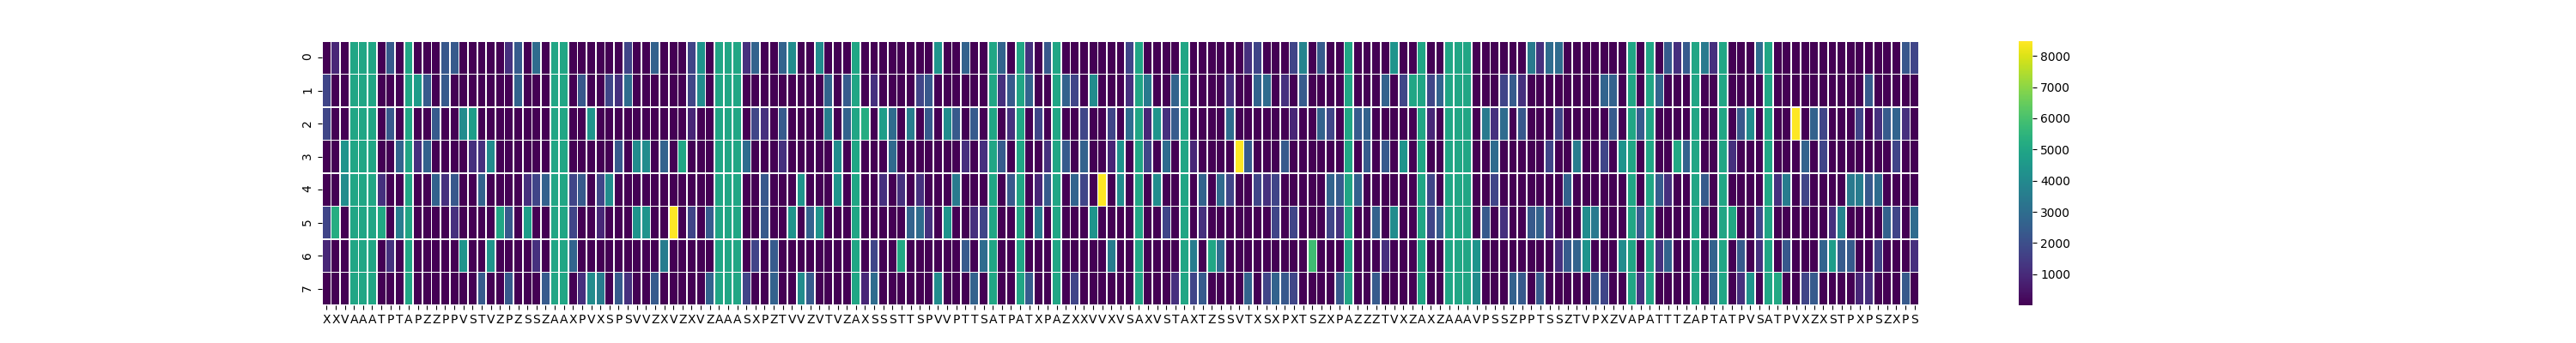

In [191]:
cell_activity = np.zeros([M,N])
for string_idx in range(len(in_strings_alpha)):
    cell_activity += sum(results.iloc[string_idx]['htm_states']) # RHS sums up the net cellular activity 
                                                                 # for each letter of the string.
        
plt.figure(figsize=(30,4))
activity = sns.heatmap(cell_activity, linewidth=0.5, cmap='viridis', xticklabels=xticks_plot)
activity.set_xticklabels(labels=xticks_plot, rotation=0)
plt.show()

### Total Cell Activity – Character-wise

<IPython.core.display.Javascript object>


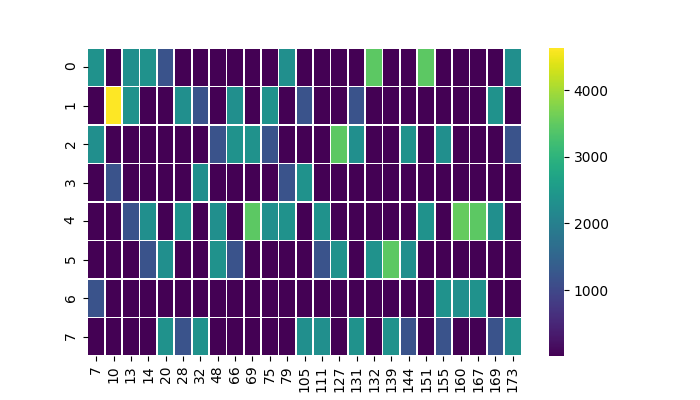

array([[2354.,    9., 2290., 2354., 1192.,    9.,    9.,    9.,    9.,
           9.,    9., 2290.,    9.,    9.,    9.,    9., 3473.,    9.,
           9., 3473.,    9.,    9.,    9.,    9., 2290.],
       [   9., 4635., 2354.,    9.,    9., 2290., 1192.,    9., 2290.,
           9., 2354.,    9., 1192.,    9.,    9., 1192.,    9.,    9.,
           9.,    9.,    9.,    9.,    9., 2354.,    9.],
       [2290.,    9.,    9.,    9.,    9.,    9.,    9., 1192., 2354.,
        2354., 1192.,    9.,    9.,    9., 3473., 2290.,    9.,    9.,
        2354.,    9., 2290.,    9.,    9.,    9., 1192.],
       [   9., 1192.,    9.,    9.,    9.,    9., 2290.,    9.,    9.,
           9.,    9., 1192., 2354.,    9.,    9.,    9.,    9.,    9.,
           9.,    9.,    9.,    9.,    9.,    9.,    9.],
       [   9.,    9., 1192., 2290.,    9., 2354.,    9., 2290.,    9.,
        3473., 2290., 2354.,    9., 2354.,    9.,    9.,    9.,    9.,
           9., 2354.,    9., 3537., 3473., 2290.,    9.],


In [209]:
char = 'P'
char_activity = cell_activity[:,list(charsMC[char])]

plt.figure(figsize=(7,4))
ch_activity = sns.heatmap(char_activity, linewidth=0.5, cmap='viridis', xticklabels=list(charsMC[char]))
plt.show()

char_activity

### Computing Total Cell Predicitivity

<IPython.core.display.Javascript object>


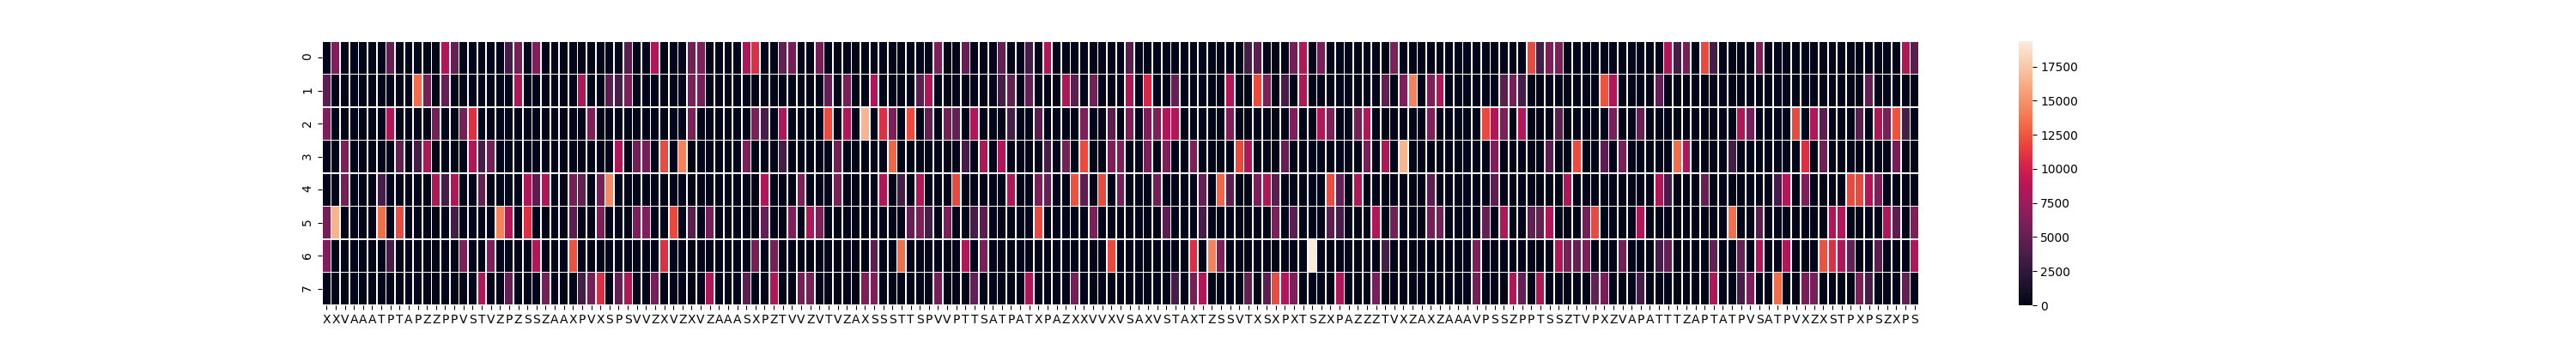

In [192]:
cell_predictivity = np.zeros([M,N])
for string_idx in range(len(in_strings_alpha)):
    cell_predictivity += sum(results.iloc[string_idx]['htm_preds'])
        
plt.figure(figsize=(30,4))
predictivity = sns.heatmap(cell_predictivity, linewidth=0.5, xticklabels=xticks_plot)
predictivity.set_xticklabels(labels=xticks_plot, rotation=0)
plt.show()

<IPython.core.display.Javascript object>


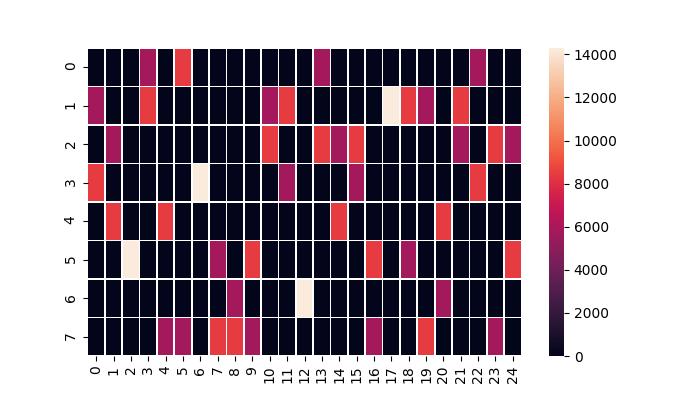

array([[    0.,     0.,     0.,  5840.,     0.,  8454.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  5840.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,  5840.,     0.,
            0.],
       [ 5840.,     0.,     0.,  8454.,     0.,     0.,     0.,     0.,
            0.,     0.,  5840.,  8454.,     0.,     0.,     0.,     0.,
            0., 14294.,  8454.,  5840.,     0.,  8454.,     0.,     0.,
            0.],
       [    0.,  5840.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,  8454.,     0.,     0.,  8454.,  5840.,  8454.,
            0.,     0.,     0.,     0.,     0.,  5840.,     0.,  8454.,
         5840.],
       [ 8454.,     0.,     0.,     0.,     0.,     0., 14294.,     0.,
            0.,     0.,     0.,  5840.,     0.,     0.,     0.,  5840.,
            0.,     0.,     0.,     0.,     0.,     0.,  8454.,     0.,
            0.],
       [    0.,  8454.,     0.,     0.,  8454.,     0.,     0.,     

In [151]:
char = 'Z'
char_predictivity = cell_predictivity[:,list(charsMC[char])]

plt.figure(figsize=(7,4))
ch_predictivity = sns.heatmap(char_predictivity, linewidth=0.5, xticklabels=list(charsMC[char]))
plt.show()

char_predictivity

## 3. Measuring Performance

**Prediction Accuracy:** #correctly predicted cols / #predicted cols 
- Prediction accuracy will be 1.0 if there is only 1 column predicted by the network and that one column is one out of the (say) 50 expected predicted columns, because 1/1 = 1.0. 
- Hence, it only makes sense to compute prediction accuracy when the number of columns predicted by the network is higher than the expected number of correctly predicted columns.

**Prediction Performance:**  moving average over the last 100 sequences

### Prediction Accuracy

In [264]:
pred_acc = []

for string_idx in range(len(in_strings_alpha)):
    
    for char_idx in range(len(results.iloc[string_idx]['htm_preds'])):
        
        correct_preds = out_strings_onehot[string_idx][char_idx] # Correct expected predictions for the 
                                                                 # particular <[string_idx][char_idx]> timestep
        
        predicted_cols_idx = np.where(results.iloc[string_idx]['htm_preds'][char_idx])[1] # Indices of the cols
                                                                 # predicted by the network for particular 
                                                                 # <[string_idx][char_idx]> timestep.
        
        if len(predicted_cols_idx) >= np.count_nonzero(correct_preds):
            
            count=0
            for col_idx in np.where(correct_preds)[0]:
                if col_idx in predicted_cols_idx:
                    count+=1
            
            accuracy = count/len(predicted_cols_idx)
            
            pred_acc.append(accuracy)
            
        else:
            pred_acc.append(0)
        

<IPython.core.display.Javascript object>


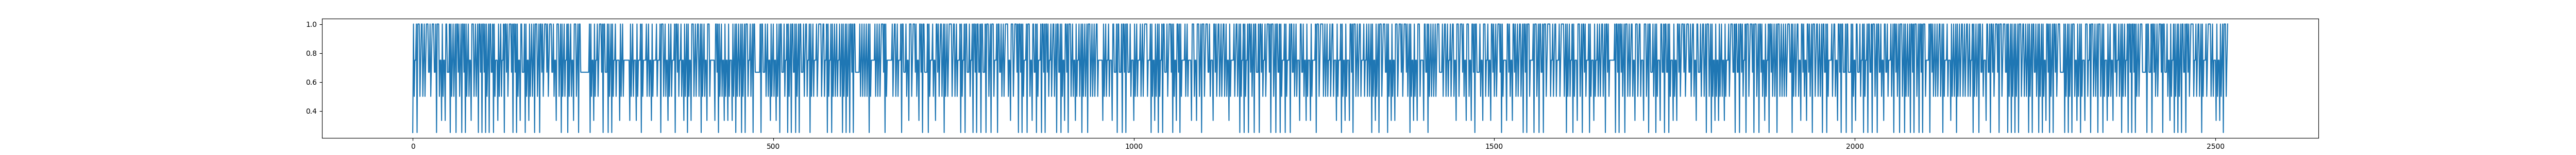

In [278]:
plt.figure(figsize=(50,3))
plt.plot(pred_acc[35000:])
plt.show()

### Prediction Performance

In [219]:
results.iloc[222]['htm_preds'][4]

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [244]:
p = np.zeros(N)
p[np.where(results.iloc[222]['htm_preds'][4])[1]] = 1
print(p)
np.where(results.iloc[222]['htm_preds'][4])[1]

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1.]


array([ 21,  33,  47,  88, 102, 109, 149, 174,   0,  11,  31,  57,  65,
        82,  90, 119, 129, 130,  12,  16,  59,  61,  78,  86, 113, 135,
       141, 164, 168, 171,  39,  62,  81, 114, 118, 134, 140, 162,  23,
        83,  98,  99, 104, 121, 128,   1,  19,  22,  27,  40,  42,  72,
        92, 106, 110, 122, 157, 172,  37,  49,  60,  95,  97, 108, 136,
       165, 170,  24,  30,  36,  46,  53, 103, 115, 163])

In [234]:
np.shape(results.iloc[4999]['htm_preds'])

(6, 8, 175)

In [255]:
np.where(out_strings_onehot[4999][0])[0]

array([  6,   7,   8,  10,  13,  14,  17,  20,  28,  32,  48,  50,  55,
        63,  64,  66,  69,  70,  71,  74,  75,  77,  79,  93,  96, 101,
       105, 107, 111, 116, 127, 131, 132, 133, 137, 139, 144, 146, 147,
       148, 151, 152, 154, 155, 159, 160, 166, 167, 169, 173])

In [263]:
a = np.array([1, 0, 0, 1, 0, 1, 1, 0, 1])
b = np.array([1, 0, 1, 1, 1, 0, 0, 1, 1])


count=0
for col_idx in np.where(a)[0]:
    if col_idx in np.where(b)[0]:
        count+=1

accuracy = count/len(np.where(b)[0])

accuracy

0.5

In [56]:
#np.shape(results.iloc[0]['htm_states'])

sum(results.iloc[1]['htm_states'])

array([[1., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.],
       ...,
       [1., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.]])